In [1]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
import os
import cv2
import glob

data_img = []
val_img = []
test_img = []
kelas_img = []
kelas_val = []
kelas_test = []

dir_train = os.listdir("dataset_angka/train")
dir_val = os.listdir("dataset_angka/val")
dir_test = os.listdir("dataset_angka/test")

for kelas in dir_train:
    path_train = glob.glob('dataset_angka\\train\\' + str(kelas) + '\\**.jpg')

    for gambar in path_train:
        img = cv2.imread(gambar, cv2.COLOR_BGR2GRAY).flatten()
        data_img.append(img/255)
        kelas_img.append(kelas)

for kelas in dir_val:
    path_val = glob.glob('dataset_angka\\val\\' + str(kelas) + '\\**.jpg')

    for gambar in path_val:
        img = cv2.imread(gambar, cv2.COLOR_BGR2GRAY).flatten()
        data_img.append(img/255)
        kelas_img.append(kelas)
        val_img.append(img/255)
        kelas_val.append(kelas)

for kelas in dir_test:
    path_test = glob.glob('dataset_angka\\test\\' + str(kelas) + '\\**.jpg')

    for gambar in path_test:
        img = cv2.imread(gambar, cv2.COLOR_BGR2GRAY).flatten()
        test_img.append(img/255)
        kelas_test.append(kelas)



In [3]:
len(kelas_test)

4209

In [4]:
pca = PCA(n_components=10)
pca_model = pca.fit_transform(data_img)
variance_ratio_model = pca.explained_variance_ratio_

In [5]:
pca_val = pca.transform(val_img)
pca_test = pca.transform(test_img)

In [6]:
from sklearn.neural_network import MLPClassifier

model_ann = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(64, 32, 16), max_iter=1000, validation_fraction=0.1)

model_ann.fit(pca_model, kelas_img)

c:\Users\laure\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64, 32, 16), max_iter=1000,
              solver='lbfgs')

In [7]:
from sklearn.metrics import accuracy_score

# Akurasi Data Model (train+val)
prediksi_ann_model=model_ann.predict(pca_model)
accuracy_score(kelas_img, prediksi_ann_model)

0.9738562091503268

In [8]:
# Akurasi Data Validasi

prediksi_ann_val=model_ann.predict(pca_val)
accuracy_score(kelas_val, prediksi_ann_val)

0.9723546234509056

In [9]:
# Akurasi Data test

prediksi_ann_test=model_ann.predict(pca_test)
accuracy_score(kelas_test, prediksi_ann_test)

0.9189831313851271

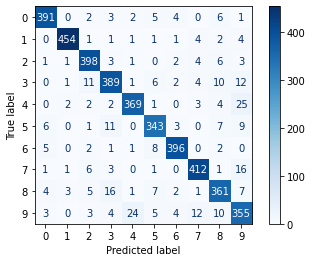

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(kelas_test, prediksi_ann_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dir_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
from sklearn.metrics import classification_report
print (classification_report(kelas_val, prediksi_ann_val))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       413
           1       0.99      0.99      0.99       468
           2       0.99      0.99      0.99       417
           3       0.97      0.95      0.96       435
           4       0.97      0.95      0.96       407
           5       0.97      0.97      0.97       379
           6       0.99      0.99      0.99       413
           7       0.98      0.99      0.98       440
           8       0.93      0.95      0.94       406
           9       0.94      0.94      0.94       418

    accuracy                           0.97      4196
   macro avg       0.97      0.97      0.97      4196
weighted avg       0.97      0.97      0.97      4196



In [12]:
from sklearn.metrics import classification_report
print (classification_report(kelas_test, prediksi_ann_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       414
           1       0.98      0.97      0.98       469
           2       0.92      0.95      0.94       419
           3       0.90      0.89      0.90       436
           4       0.92      0.90      0.91       408
           5       0.91      0.90      0.91       380
           6       0.96      0.95      0.96       415
           7       0.94      0.93      0.94       441
           8       0.88      0.89      0.88       407
           9       0.82      0.85      0.83       420

    accuracy                           0.92      4209
   macro avg       0.92      0.92      0.92      4209
weighted avg       0.92      0.92      0.92      4209

